In [1]:
import keras
from keras.datasets import boston_housing

from keras.models import Sequential
from keras.layers import Dense

from sklearn import preprocessing
from sklearn.preprocessing import scale
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [3]:
x_train_scaled = preprocessing.scale(x_train)

x_train_scaled[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [4]:

x_test_scaled = preprocessing.scale(x_test)
x_train_scaled[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [ ]:
y_train


In [6]:
y_train /=50.0
y_test /=50.0


In [7]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(13,)))
#model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='sgd', metrics=['mse'])


In [8]:
history = model.fit(x_train_scaled, y_train,
batch_size=32,
epochs=200,
verbose=1,
validation_split = 0.2
)

Epoch 1/200
11/11 [==============================] - 1s 28ms/step - loss: 0.1629 - mse: 0.1629 - val_loss: 0.1845 - val_mse: 0.1845
Epoch 2/200
11/11 [==============================] - 0s 7ms/step - loss: 0.1570 - mse: 0.1570 - val_loss: 0.1779 - val_mse: 0.1779
Epoch 3/200
11/11 [==============================] - 0s 6ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1699 - val_mse: 0.1699
Epoch 4/200
11/11 [==============================] - 0s 6ms/step - loss: 0.1425 - mse: 0.1425 - val_loss: 0.1609 - val_mse: 0.1609
Epoch 5/200
11/11 [==============================] - 0s 7ms/step - loss: 0.1337 - mse: 0.1337 - val_loss: 0.1514 - val_mse: 0.1514
Epoch 6/200
11/11 [==============================] - 0s 8ms/step - loss: 0.1245 - mse: 0.1245 - val_loss: 0.1410 - val_mse: 0.1410
Epoch 7/200
11/11 [==============================] - 0s 7ms/step - loss: 0.1145 - mse: 0.1145 - val_loss: 0.1297 - val_mse: 0.1297
Epoch 8/200
11/11 [==============================] - 0s 6ms/step - loss: 0.1039 - 

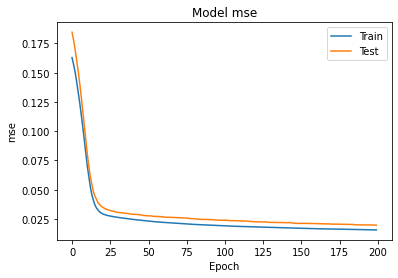

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

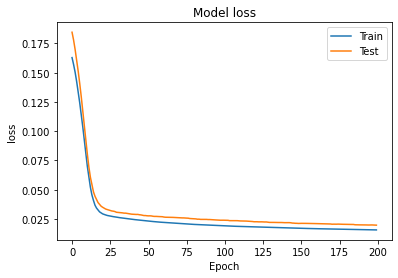

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [16]:
score = model.evaluate(x_test_scaled, y_test, verbose=0)
print('Test loss:', score[0])


Test loss: 0.013896743766963482
Test accuracy: 0.013896743766963482


In [21]:

prediction = model.predict(x_test_scaled)

print(prediction.flatten()*50)
print(y_test.flatten()*50)


[13.984749 19.081263 22.583485 21.63655  23.741955 20.454597 29.55363
 25.021765 19.257927 18.018536 20.731236 19.1989   16.439762 29.902163
 15.455432 24.562366 25.252676 24.29108  16.883207 15.615894 12.237109
 16.690535 21.407104 19.970829 28.240875 18.485838 22.301037 32.01656
 15.316895 23.908558 21.399384 17.066189 26.644823 24.611649 15.786868
 10.589962 18.677444 22.320124 16.436724 30.544355 27.700312 25.637606
 15.613601 30.0852   25.510555 23.204514 26.632303 20.08073  18.743093
 23.563784 32.493965 22.356665 11.843674 16.957205 30.484142 25.671577
 15.053837 32.779675 26.430046 24.372084 20.067194 16.441778 16.49251
 20.302715 23.92648  29.155376 16.10203  28.327877 11.413079 12.740726
 15.700173 28.85205  17.482904 12.857127 28.129494 24.091267 23.449694
 24.353725 30.873188 10.725386 22.61252  30.74067  21.30704  16.043636
 20.886774 22.547422 16.56511  18.223278 22.047802 21.119263 20.740408
 26.396757 27.464815 31.630304 30.39669  21.817257 29.891916 22.72064
 24.315144